In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Belajar Pengembangan Machine Learning/bbc-text.csv')

In [4]:
data.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [6]:
# one-hot encoding
category = pd.get_dummies(data.category)
data_new = pd.concat([data, category], axis=1)
data_new = data_new.drop(columns='category')
data_new

,text,business,entertainment,politics,sport,tech
0,tv future in the hands of viewers with home th...,0,0,0,0,1
1,worldcom boss left books alone former worldc...,1,0,0,0,0
2,tigers wary of farrell gamble leicester say ...,0,0,0,1,0
3,yeading face newcastle in fa cup premiership s...,0,0,0,1,0
4,ocean s twelve raids box office ocean s twelve...,0,1,0,0,0
...,...,...,...,...,...,...
2220,cars pull down us retail figures us retail sal...,1,0,0,0,0
2221,kilroy unveils immigration policy ex-chatshow ...,0,0,1,0,0
2222,rem announce new glasgow concert us band rem h...,0,1,0,0,0
2223,how political squabbles snowball it s become c...,0,0,1,0,0


In [8]:
# ubah nilai dataframe ke numpy array
teks = data_new['text'].values
label = data_new[['business', 'entertainment', 'politics', 'sport', 'tech']].values

In [9]:
# bagi data untuk training dan data untuk testing
from sklearn.model_selection import train_test_split
teks_latih, teks_test, label_latih, label_test = train_test_split(teks, label, test_size=0.2)

In [10]:
# ubah setiap teks pada dataset ke bilangan numerik dengan tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(teks_latih)
tokenizer.fit_on_texts(teks_test)

sekuen_latih = tokenizer.texts_to_sequences(teks_latih)
sekuen_test = tokenizer.texts_to_sequences(teks_test)

padded_latih = pad_sequences(sekuen_latih)
padded_test = pad_sequences(sekuen_test)

In [11]:
# buat arsitektur model
import tensorflow as tf
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
                             tf.keras.layers.LSTM(64),
                             tf.keras.layers.Dense(128, activation=tf.nn.relu),
                             tf.keras.layers.Dense(64, activation=tf.nn.relu),
                             tf.keras.layers.Dense(5, activation=tf.nn.softmax),
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [12]:
# fungsi callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95 and logs.get('val_accuracy')>0.95):
      print("\nAkurasi sudah mencapai 90%!")
      self.model.stop_training = True
callbacks = myCallback()

In [13]:
# run model
num_epochs = 20
history = model.fit(padded_latih, label_latih, epochs=num_epochs,
                    validation_data=(padded_test, label_test), verbose=2, callbacks=[callbacks])

Epoch 1/20
56/56 - 123s - loss: 1.6075 - accuracy: 0.2455 - val_loss: 1.5875 - val_accuracy: 0.3236
Epoch 2/20
56/56 - 121s - loss: 1.4537 - accuracy: 0.3860 - val_loss: 1.2147 - val_accuracy: 0.3843
Epoch 3/20
56/56 - 121s - loss: 1.0094 - accuracy: 0.5309 - val_loss: 1.2961 - val_accuracy: 0.3865
Epoch 4/20
56/56 - 122s - loss: 0.6503 - accuracy: 0.7534 - val_loss: 0.5857 - val_accuracy: 0.7618
Epoch 5/20
56/56 - 121s - loss: 0.1883 - accuracy: 0.9365 - val_loss: 0.5067 - val_accuracy: 0.8427
Epoch 6/20
56/56 - 122s - loss: 0.0639 - accuracy: 0.9826 - val_loss: 0.5688 - val_accuracy: 0.8337
Epoch 7/20
56/56 - 121s - loss: 0.0507 - accuracy: 0.9848 - val_loss: 0.5619 - val_accuracy: 0.8494
Epoch 8/20
56/56 - 125s - loss: 0.0106 - accuracy: 0.9972 - val_loss: 0.6638 - val_accuracy: 0.8292
Epoch 9/20
56/56 - 123s - loss: 0.0231 - accuracy: 0.9949 - val_loss: 0.7048 - val_accuracy: 0.8315
Epoch 10/20
56/56 - 123s - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.6703 - val_accuracy: 0.8472

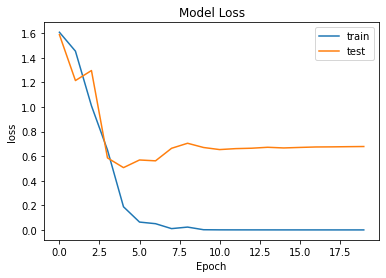

In [18]:
# membuat plot Model loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

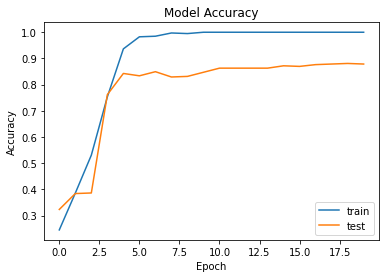

In [24]:
# membuat plot Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()